In [5]:
import matplotlib.pyplot as plt

In [6]:
X = [[6], [8], [10], [14], [18]]

In [7]:
y = [[7], [9], [13], [17.5], [18]]

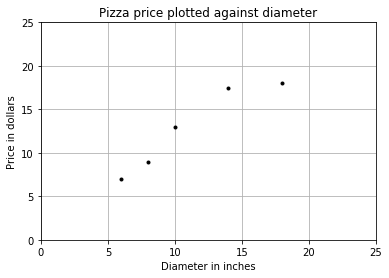

In [8]:
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

In [11]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print('A 12" pizza should cost: ${}'.format(model.predict(12)))

A 12" pizza should cost: $[[ 13.68103448]]


In [13]:
import numpy as np

In [14]:
print('Residual sum of squares: {}'.format(np.mean(model.predict(X) - y) ** 2))

Residual sum of squares: 1.2621774483536191e-31


In [15]:
# ddof keywork parameter is used to set Bessel's correction
# calculates sample variance
print(np.var([6, 8, 10, 14, 18], ddof=1))

23.2


In [16]:
print(np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])[0][1])

22.65


In [17]:
X_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]

In [18]:
model.score(X_test, y_test)

0.6620052929422553

## Multiple Linear Regression

In [19]:
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]

In [20]:
y = [[7], [9], [13], [17.5], [18]]

In [21]:
model = LinearRegression()

In [22]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]

In [24]:
y_test = [[11], [8.5], [15], [18], [11]]

In [25]:
predictions = model.predict(X_test)

In [29]:
for i, prediction in enumerate(predictions):
    print('Predicted: {}, Target: {}'.format(prediction, y_test[i]))

Predicted: [ 10.0625], Target: [11]
Predicted: [ 10.28125], Target: [8.5]
Predicted: [ 13.09375], Target: [15]
Predicted: [ 18.14583333], Target: [18]
Predicted: [ 13.3125], Target: [11]


In [30]:
print(model.score(X_test, y_test))

0.770167773132


## Polynomial regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]

In [53]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy)

In [54]:
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)

In [55]:
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))

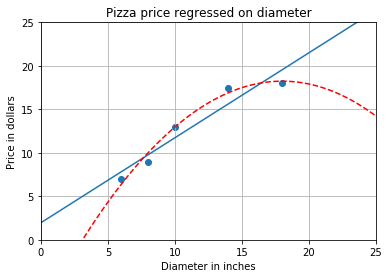

In [56]:
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r',
linestyle='--')
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25]) 
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()

In [57]:
print(X_train)

[[6], [8], [10], [14], [18]]


In [58]:
print(X_train_quadratic)

[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   10.  100.]
 [   1.   14.  196.]
 [   1.   18.  324.]]


In [59]:
print(X_test)

[[6], [8], [11], [16]]


In [60]:
print(X_test_quadratic)

[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   11.  121.]
 [   1.   16.  256.]]


In [61]:
print(regressor.score(X_test, y_test))

0.809726797708


In [63]:
print(regressor_quadratic.score(X_test_quadratic, y_test))

0.867544365635
